In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sensor_data_200.txt", delimiter=" ", header = None, names = ("date","time","ir","lidar"))

In [7]:
df.head(10)

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


(array([4.000e+00, 1.000e+01, 1.300e+01, 5.900e+01, 8.400e+01, 2.050e+02,
        3.530e+02, 6.680e+02, 1.053e+03, 1.584e+03, 2.252e+03, 2.638e+03,
        3.225e+03, 3.674e+03, 3.920e+03, 4.261e+03, 4.228e+03, 4.355e+03,
        4.409e+03, 4.201e+03, 3.897e+03, 3.572e+03, 3.108e+03, 2.459e+03,
        1.812e+03, 1.224e+03, 7.490e+02, 4.860e+02, 2.520e+02, 1.270e+02,
        5.500e+01, 3.200e+01, 0.000e+00, 1.500e+01, 3.000e+00, 1.000e+00]),
 array([193., 194., 195., 196., 197., 198., 199., 200., 201., 202., 203.,
        204., 205., 206., 207., 208., 209., 210., 211., 212., 213., 214.,
        215., 216., 217., 218., 219., 220., 221., 222., 223., 224., 225.,
        226., 227., 228., 229.]),
 <a list of 36 Patch objects>)

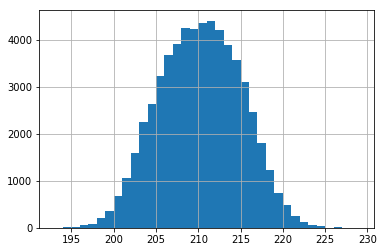

In [3]:
plt.grid()
plt.hist(df.lidar, bins = max(df.lidar) - min(df.lidar))

In [5]:
df.describe()

,date,time,ir,lidar
count,5.898800e+04,58988.000000,58988.000000,58988.000000
mean,2.018012e+07,117591.959144,308.681851,209.737133
std,7.202676e-01,67837.713969,10.459187,4.838192
min,2.018012e+07,0.000000,283.000000,193.000000
25%,2.018012e+07,61542.250000,300.000000,206.000000
50%,2.018012e+07,113958.500000,308.000000,210.000000
75%,2.018012e+07,174442.750000,317.000000,213.000000
max,2.018012e+07,235959.000000,338.000000,229.000000


In [15]:
print(df.lidar.values.sum()/len(df.lidar.values))
print(df.lidar.values.mean())

209.73713297619855
209.73713297619855


In [17]:
mu = df.lidar.values.mean()
zs = df.lidar.values
diff_square = [(z - mu)**2 for z in zs]

In [21]:
sampling_var = sum(diff_square) / len(zs)
unbiased_var = sum(diff_square) / (len(zs)-1)

In [23]:
print(sampling_var)
print(unbiased_var)

23.407709770274106
23.40810659855441


In [55]:
stddev = (sampling_var)**0.5
stddev

4.838151482774605

In [27]:
freqs = pd.DataFrame(df.lidar.value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [28]:
freqs['probs'] = freqs.lidar / len(df.lidar.values)

In [32]:
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [33]:
freqs.probs.sum()

1.0

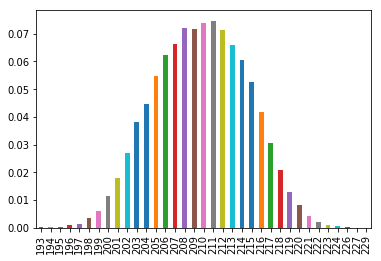

In [35]:
freqs.probs.sort_index().plot.bar()

In [42]:
def drawing():
    return freqs.sample(n = 1, weights = 'probs').index[0]
drawing()

213

In [50]:
samples = [drawing() for _ in range(10000)]

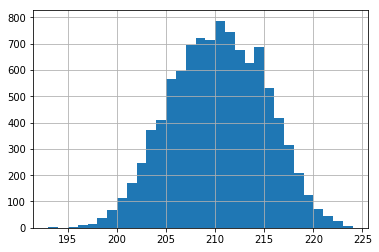

In [51]:
samples_df = pd.DataFrame(samples, columns=['lidar'])
p = samples_df.lidar
p.hist(bins = max(p)-min(p))

In [57]:
from scipy.stats import norm
xs = range(190, 230)
ys = [norm.pdf(z, mu, stddev) for z in xs]


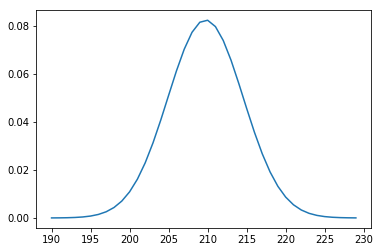

In [58]:
plt.plot(xs, ys)